In [127]:
%load_ext autoreload
%autoreload 2

import time
import pickle
import numpy as np
from scipy import optimize

import matplotlib.pyplot as plt   
plt.style.use('seaborn-whitegrid')
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

from BabyMAKROModel import BabyMAKROModelClass

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [128]:
model = BabyMAKROModelClass(name='baseline') # create an instance of the model

In [129]:
par = model.par
ss = model.ss
sol = model.sol

In [130]:
# choose parameter values
values = [0.8, 2.5]

# choose variables to plot PLEASE CHOOSE 12 VARIABLES
varlist = ['P_C','P_Y','P_Y_KL','Y','C','C_Y','K','ell','E','r_K','r_ell','r_E']

In [131]:
# dict for sol
s1={}

# dict for ss
s2={}

for i,value in enumerate(values):
    
    # choose parameter <<<----------
    par.sigma = value
    
    # run model in SS
    model.find_ss(0.50)
    model.set_exo_ss()
    model.set_unknowns_ss()
    model.evaluate_blocks(py=True)
    errors = model.get_errors()
    model.evaluate_blocks()
    
    # apply shock
    model.calc_jac()
    model.set_exo_ss()
    Tshock = 20
    shock = 0.2*ss.r_E
    persistence = 0.75**np.arange(Tshock)
    sol.r_E[:Tshock] = ss.r_E + shock*persistence

    # run model with shock
    model.set_unknowns_ss()
    model.evaluate_blocks()
    errors = model.get_errors()
    model.find_IRF()

    # create new variables
    for varname in varlist:
        key = str(varname+str(i)) 
        s1[key] = sol.__dict__[varname]
        s2[key] = ss.__dict__[varname]

initial:
   max. abs. error = 2.74e+01
    2.22e-16 in bargaining_cond
    1.04e+00 in Bq_match
    1.38e-02 in FOC_capital_agency
    2.22e-16 in FOC_K_ell
    7.02e-02 in FOC_E_Y_KL
    2.74e+01 in mkt_clearing
    4.80e-02 in repacking_prices_C

it = 0
 solve: t1-t0 = 1.1 secs
   max. abs. error = 2.74e+01
    5.71e-03 in bargaining_cond
    1.09e-01 in Bq_match
    2.42e-03 in FOC_capital_agency
    4.13e-03 in FOC_K_ell
    5.29e-03 in FOC_E_Y_KL
    2.65e+00 in mkt_clearing
    1.64e-03 in repacking_prices_C
 evaluate: t1-t0 = 0.0 secs
 update_jac: t1-t0 = 0.1 secs

it = 1
 solve: t1-t0 = 1.1 secs
   max. abs. error = 2.65e+00
    3.23e-03 in bargaining_cond
    3.99e-02 in Bq_match
    8.30e-04 in FOC_capital_agency
    1.76e-03 in FOC_K_ell
    1.43e-03 in FOC_E_Y_KL
    8.50e-01 in mkt_clearing
    1.05e-03 in repacking_prices_C
 evaluate: t1-t0 = 0.0 secs
 update_jac: t1-t0 = 0.1 secs

it = 2
 solve: t1-t0 = 1.1 secs
   max. abs. error = 8.50e-01
    3.91e-04 in bargaining_co

 solve: t1-t0 = 1.3 secs
   max. abs. error = 5.41e-06
    1.40e-09 in bargaining_cond
    2.16e-08 in Bq_match
    4.81e-10 in FOC_capital_agency
    7.82e-10 in FOC_K_ell
    6.20e-10 in FOC_E_Y_KL
    3.67e-07 in mkt_clearing
    4.64e-10 in repacking_prices_C
 evaluate: t1-t0 = 0.0 secs
 update_jac: t1-t0 = 0.1 secs

it = 10
 solve: t1-t0 = 1.0 secs
   max. abs. error = 3.67e-07
    2.46e-10 in bargaining_cond
    8.90e-09 in Bq_match
    1.10e-10 in FOC_capital_agency
    1.38e-10 in FOC_K_ell
    1.07e-10 in FOC_E_Y_KL
    7.02e-08 in mkt_clearing
    9.73e-11 in repacking_prices_C
 evaluate: t1-t0 = 0.0 secs
 update_jac: t1-t0 = 0.1 secs

it = 11
 solve: t1-t0 = 1.0 secs
   max. abs. error = 7.02e-08
    1.09e-11 in bargaining_cond
    3.16e-10 in Bq_match
    4.60e-12 in FOC_capital_agency
    6.28e-12 in FOC_K_ell
    4.33e-12 in FOC_E_Y_KL
    2.79e-09 in mkt_clearing
    4.17e-12 in repacking_prices_C
 evaluate: t1-t0 = 0.0 secs
 update_jac: t1-t0 = 0.1 secs

it = 12
 solve:

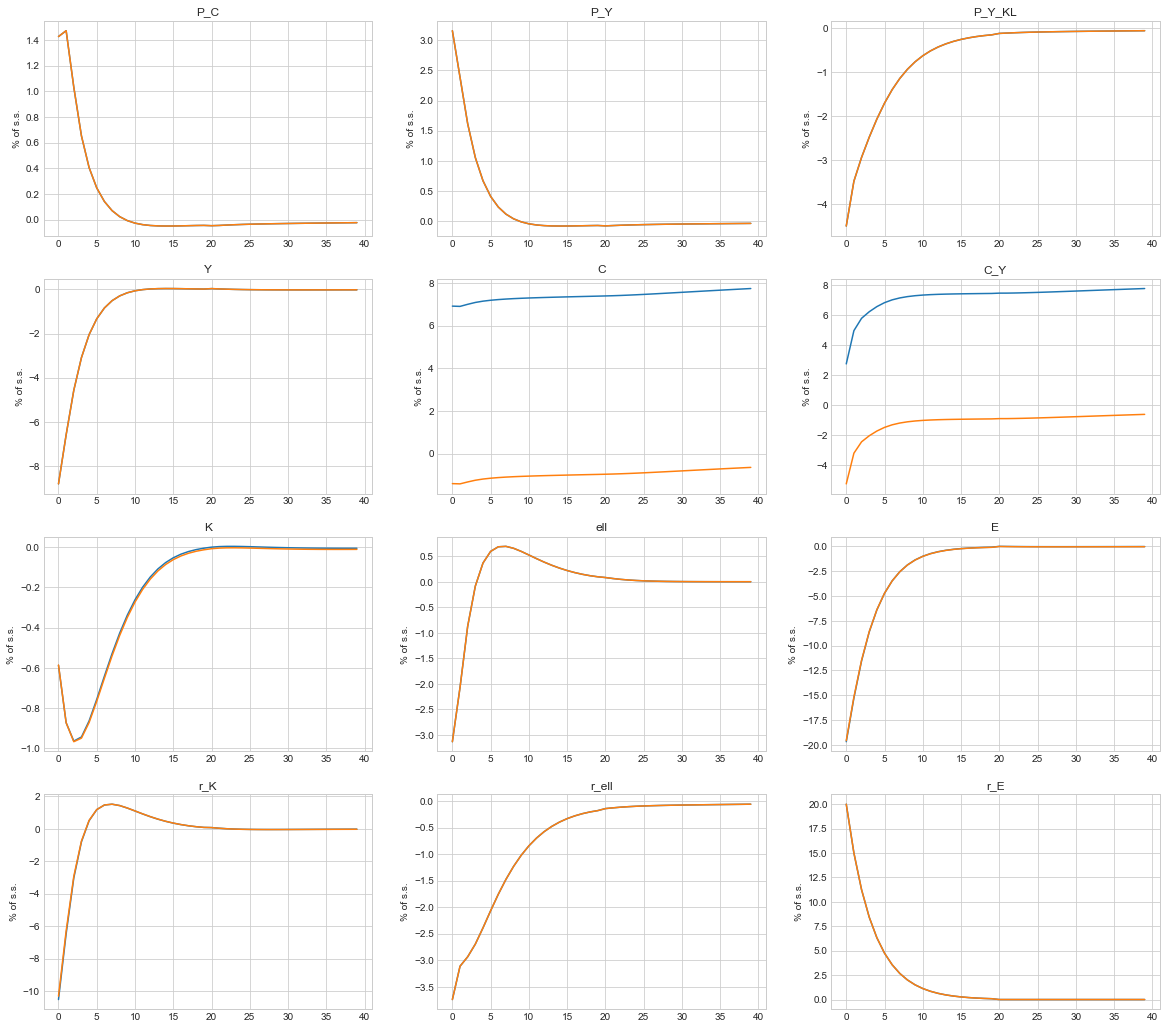

In [132]:
T_IRF = 40

fig = plt.figure(figsize=(20,20/1.1))

for i,varname in enumerate(varlist):
    
    ax = fig.add_subplot(4,3,i+1)
    
    ax.set_ylabel('% of s.s.')
    ax.set_title(varname)
        
    for j,value in enumerate(values):
            ax.plot((s1[varname+str(j)][:T_IRF]/s2[varname+str(j)]-1)*100)
